# Projeto de Desenvolvimento - CCF 425
---
## O Brasil em Dados: Análise acerca do sentimento de eleitores em relação a possíveis candidatos a presidência por meio de tweets

### Alunos:
- Eduardo Torres Tristão (4219)
- Guilherme Corrêa Melos (3882)
- Luís Henrique Carvalho (4254)
- Vinicius Júlio Barbosa (3495)

---

Definido o tema para o projeto e as perguntas a serem respondidas, deu-se início então a parte de coleta de dados a partir da API do twitter. Para essa coleta, foi necessário acessar o servidor do twitter por meio de tokens gerados a partir da criação de conta para realizar essa coleta. Utilizando a biblioteca tweepy, foram extraídas informações de tweets sobre 12 diferentes pré-candidatos a presidência da república.  

Desse modo, para cada candidato foram gerados dados relativos a tweets contendo comentários positivos (honesto, inteligente, correto etc.), negativos (corrupto, fascista, machista etc.) e palavras chave relativas a temas políticos (reforma agrária, corrupção etc.) no período entre os dias 10/06/2022 e 17/06/2022. Esses dados foram então armazenados em arquivos de formato .csv para manipulação e extração de informações por meio da biblioteca pandas.

Por meio da biblioteca seaborn, foram gerados então gráficos para uma análise visual dessas informações coletadas. Para uma melhor visualização, alguns gráficos gerados foram configurados para escala logaritmica.

---

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tensorflow as tf

warnings.filterwarnings(action = 'ignore')

In [5]:
# Carregando dados
import glob

def df_all_folder(path, local=False):
    if local:
        all_files = glob.glob(path + "*_tweets_locais.csv")
    else:
        all_files = glob.glob(path + "*_por_tema_tweets.csv")
    if len(all_files) == 0:
        all_files = glob.glob(path + "*_tweets.csv")
    li = []    
    
    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace("_por_tema_tweets.csv", "")
        x = x.replace("dados/ultimos_7_dias\\", "")
        x = x.replace("dados/ultimos_7_dias/pos\\", "")
        x = x.replace("dados/ultimos_7_dias/neg\\", "")
        x = x.replace("_tweets.csv", "")
        x = x.replace("_tweets_locais.csv", "")
        x = x.replace("dados/ultimos_100_tweets\\", "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().rename(columns={'level_0': "candidato"})

In [6]:
path = "dados/ultimos_7_dias/"
df = df_all_folder(path)
df = df.rename(columns={'level_1': "data"})

In [7]:
df

,candidato,data,ditadura,reforma trabalhista,feminismo,reforma agrária,corrupção,segurança
0,bivar,2022-06-10T21:40:36.000Z,0,0,0,0,0,0
1,bivar,2022-06-11T00:00:00.000Z,0,0,0,0,2,0
2,bivar,2022-06-12T00:00:00.000Z,0,0,0,0,0,0
3,bivar,2022-06-13T00:00:00.000Z,0,0,0,0,5,0
4,bivar,2022-06-14T00:00:00.000Z,0,0,0,0,7,0
...,...,...,...,...,...,...,...,...
91,vera_lucia,2022-06-13T00:00:00.000Z,0,0,0,0,0,0
92,vera_lucia,2022-06-14T00:00:00.000Z,0,0,0,0,0,0
93,vera_lucia,2022-06-15T00:00:00.000Z,0,0,0,0,0,0
94,vera_lucia,2022-06-16T00:00:00.000Z,0,0,0,0,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   candidato            96 non-null     object
 1   data                 96 non-null     object
 2   ditadura             96 non-null     int64 
 3   reforma trabalhista  96 non-null     int64 
 4   feminismo            96 non-null     int64 
 5   reforma agrária      96 non-null     int64 
 6   corrupção            96 non-null     int64 
 7   segurança            96 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ KB


## Análise de menções Candidato

### Tópico

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def create_barplot(df, column, theme):
    df = df.groupby(column)[theme].sum().sort_values(ascending = False)
    g = sns.barplot(x = np.log(df.values), y = df.index, orient ='h', palette = "inferno")
    plt.title("Candidado x frequência de menções sobre {}".format(theme))
    plt.xlabel("{}".format(theme.title()))
    plt.ylabel("Candidato")
    plt.show()
                                                            


In [10]:
import matplotlib.pyplot as plt

def generate_barplots_by_topic(df, topic):
    topics = df.columns
    path = 'images/candidatos_por_topico_bar/'
    for x in topics:
        if x != "candidato" and x != 'data':
            create_barplot(df, topic, x)

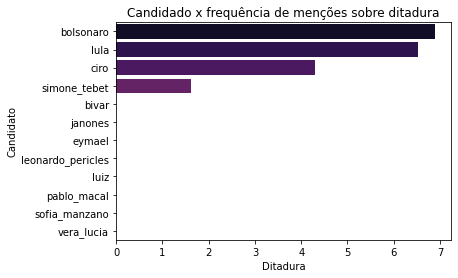

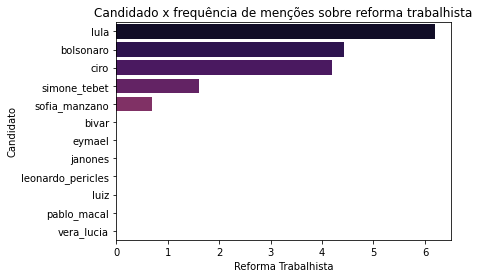

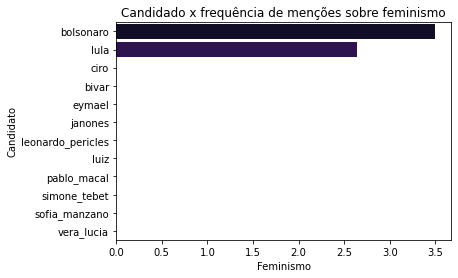

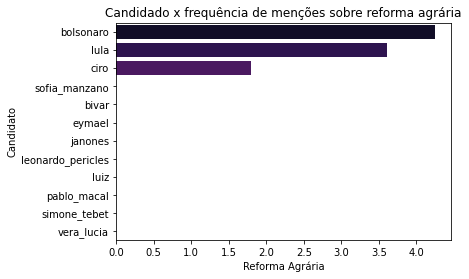

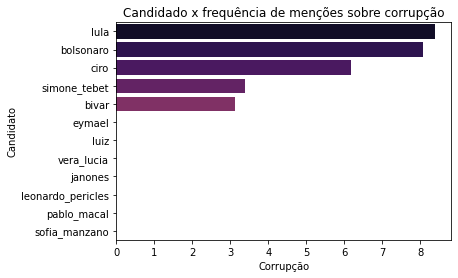

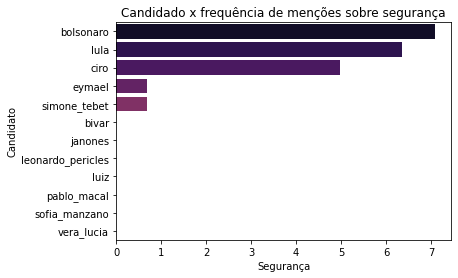

In [11]:
generate_barplots_by_topic(df, "candidato")

---

Observando os gráficos gerados, é perceptível a ausência de tweets relativos a candidatos de partidos menores na maioria dos temas como Leonardo Péricles, Vera Lucia entre outros. Em contrapartida, candidatos como Jair Bolsonaro, Lula e Ciro aparecem em grande parte das menções relativas a esses temas.

---

### Comentários positivos

In [12]:
df = df_all_folder("dados/ultimos_7_dias/pos/").rename(columns={'level_1': "data"})

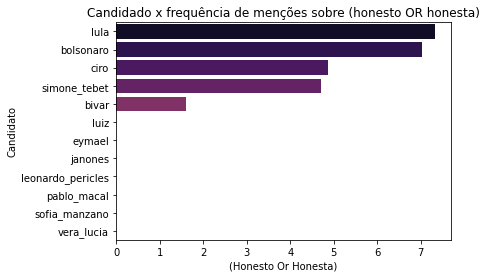

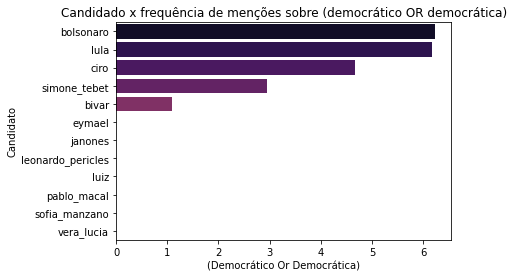

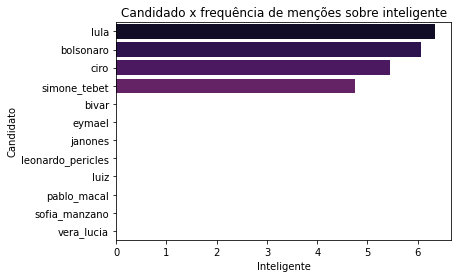

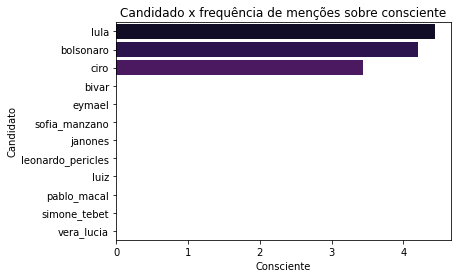

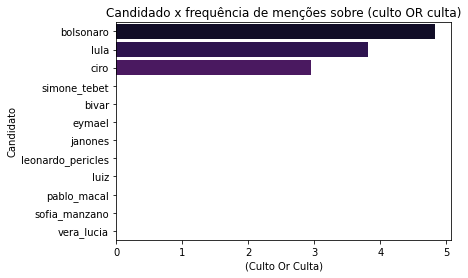

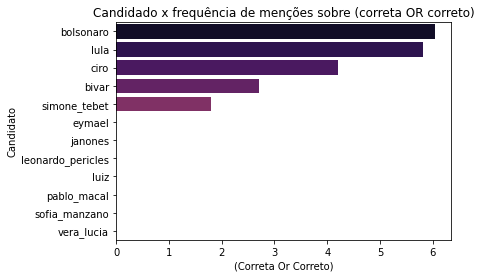

In [13]:
generate_barplots_by_topic(df, "candidato")

---

Sobre os comentários positivos, alguns candidatos como Simone Tebet e Luciano Bivar apareceram com maior frequência além dos candidatos de maior popularidade (Bolsonaro, Lula e Ciro).

---

### Comentários negativos

In [14]:
df = df_all_folder("dados/ultimos_7_dias/neg/").rename(columns={'level_1': "data"})

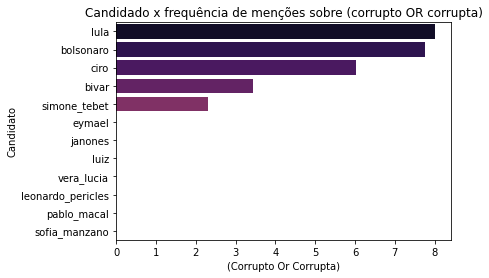

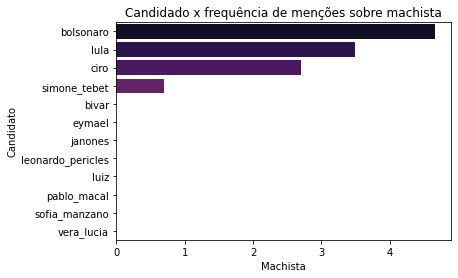

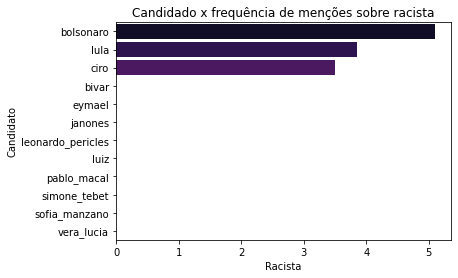

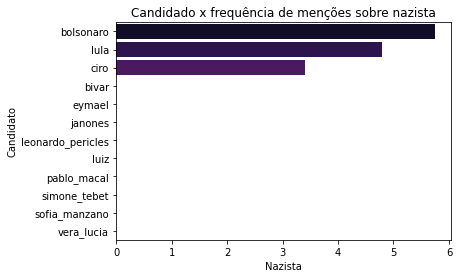

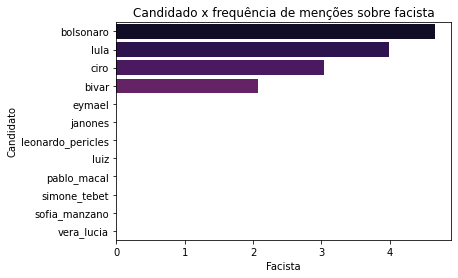

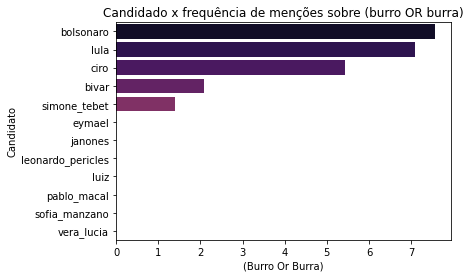

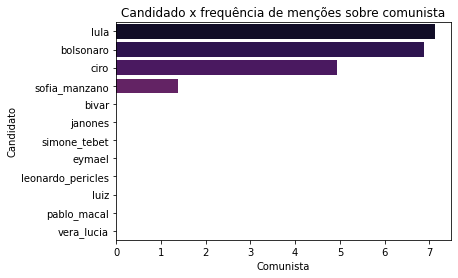

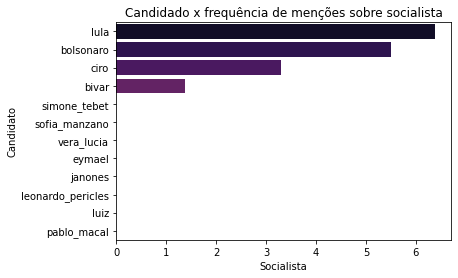

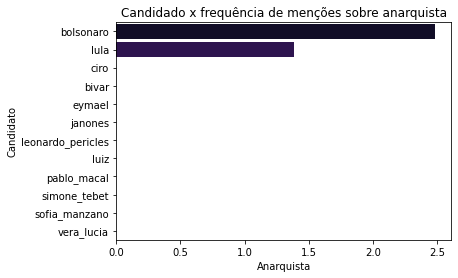

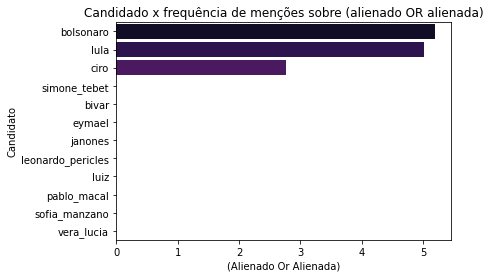

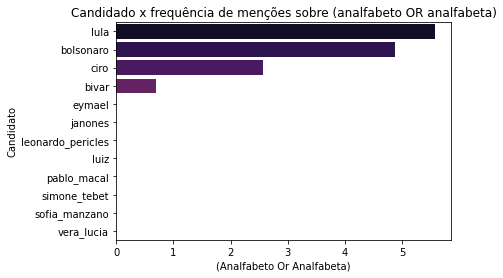

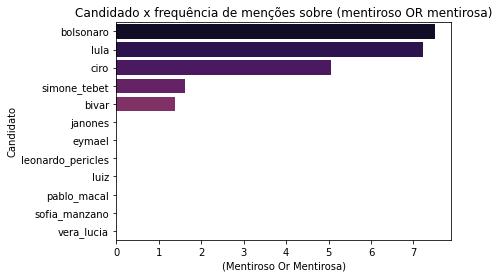

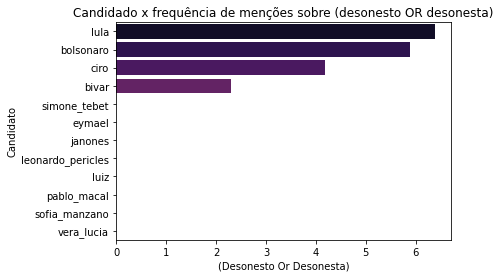

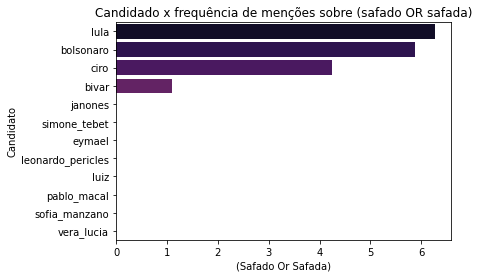

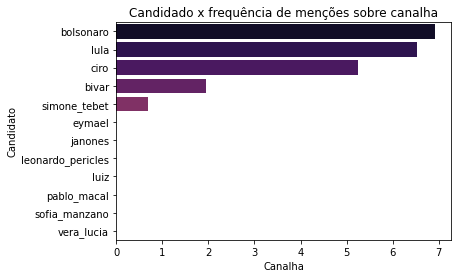

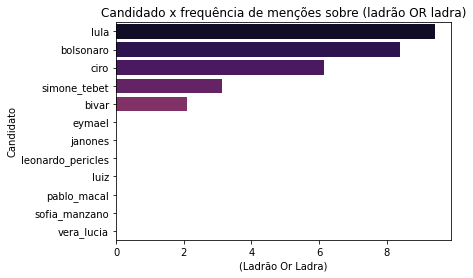

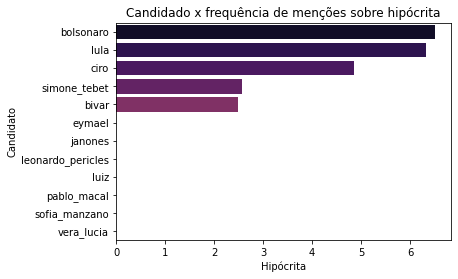

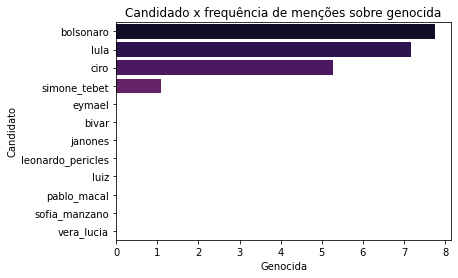

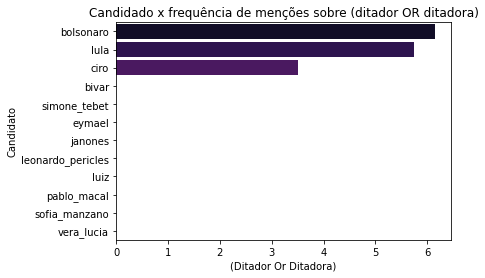

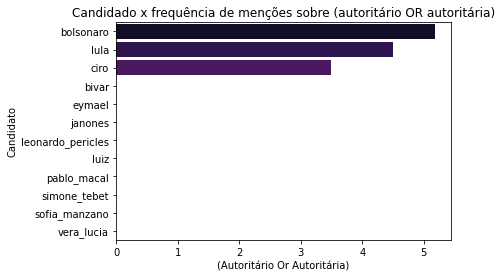

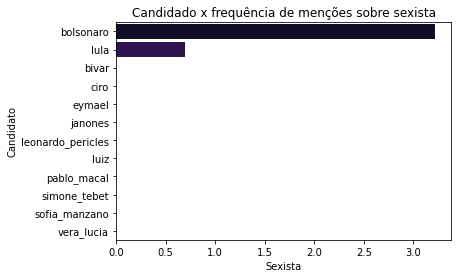

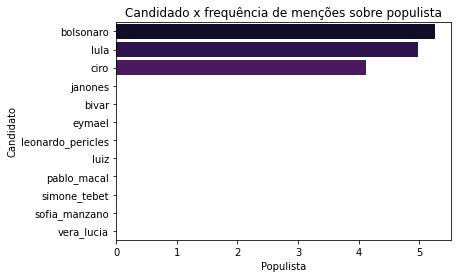

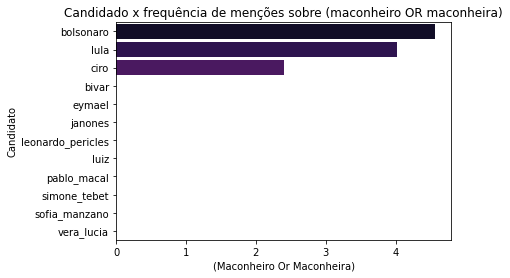

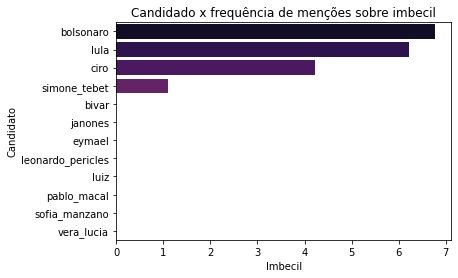

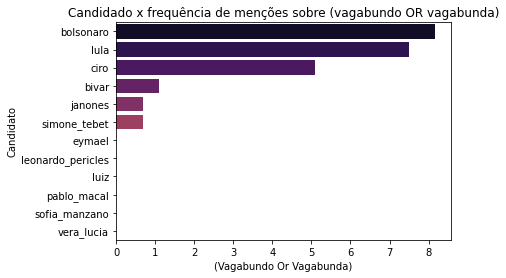

In [15]:
generate_barplots_by_topic(df, "candidato")

---

Mantendo o padrão analisado anteriormente, os candidatos Bolsonaro, Lula e Ciro aparecem com maior frequência em todos os tweets com comentários negativos. Vale ressaltar que comentários como corrupto/corrupta, vagabundo/vagabunda e ladrão/ladra abrangeram uma gama maior de candidatos que o normal.

---

## Quantidade de Tweets por dia da Semana

In [16]:
df1 = df_all_folder("dados/ultimos_7_dias/pos/").rename(columns={'level_1': "data"})

df1['data'] = pd.to_datetime(df1['data']).dt.day_name()
df1 = df1.groupby('data').sum()
df1

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto)
data,,,,,,
Friday,454,125,156,25,30,141
Monday,581,178,387,22,40,116
Saturday,385,207,129,13,28,121
Sunday,433,173,155,15,28,108
Thursday,410,153,142,28,29,119
Tuesday,361,169,182,39,19,120
Wednesday,280,115,201,44,16,123


In [17]:
dfp = df1.copy()
dfp['Total'] = dfp.apply(lambda x: x.sum(), axis = 1)

In [18]:
data_engajamento = dfp.groupby("data")['Total'].sum().sort_values(ascending=False)

In [19]:
data_engajamento

data
Monday       1324
Friday        931
Sunday        912
Tuesday       890
Saturday      883
Thursday      881
Wednesday     779
Name: Total, dtype: int64

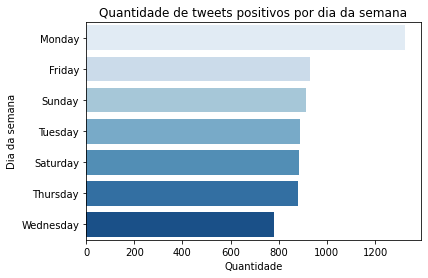

In [20]:
sns.barplot(y = data_engajamento.index, x = data_engajamento.values, orient = 'h',palette = "Blues")
plt.xlabel("Quantidade")
plt.ylabel("Dia da semana")
plt.title("Quantidade de tweets positivos por dia da semana")
plt.show()

In [21]:
df2 = df_all_folder("dados/ultimos_7_dias/neg/").rename(columns={'level_1': "data"})

df2['data'] = pd.to_datetime(df2['data']).dt.day_name()
df2 = df2.groupby('data').sum()
df2

,(corrupto OR corrupta),machista,racista,nazista,facista,(burro OR burra),comunista,socialista,anarquista,(alienado OR alienada),...,(ladrão OR ladra),hipócrita,genocida,(ditador OR ditadora),(autoritário OR autoritária),sexista,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda)
data,,,,,,,,,,,,,,,,,,,,,
Friday,1015,28,34,80,26,659,434,98,4,63,...,3085,260,594,91,36,8,100,14,243,1307
Monday,813,17,41,52,32,412,307,83,0,51,...,2444,154,606,147,54,2,50,24,222,791
Saturday,681,22,27,50,24,399,318,63,2,28,...,2380,100,389,155,41,5,47,9,171,703
Sunday,826,17,15,47,33,469,282,97,2,44,...,2367,95,438,128,39,2,40,48,181,713
Thursday,932,25,53,121,16,399,388,234,3,62,...,2648,240,757,86,28,4,41,32,232,783
Tuesday,765,18,43,61,28,558,324,161,6,44,...,2309,139,602,118,45,3,56,21,189,623
Wednesday,794,29,31,54,30,478,299,135,0,55,...,2080,390,454,88,58,3,66,15,204,586


In [22]:
dfp = df2.copy()
dfp['Total'] = dfp.apply(lambda x: x.sum(), axis = 1)

In [23]:
data_engajamento = dfp.groupby("data")['Total'].sum().sort_values(ascending=False)

In [24]:
data_engajamento

data
Friday       10045
Thursday      8159
Monday        7135
Wednesday     7018
Tuesday       6977
Sunday        6963
Saturday      6403
Name: Total, dtype: int64

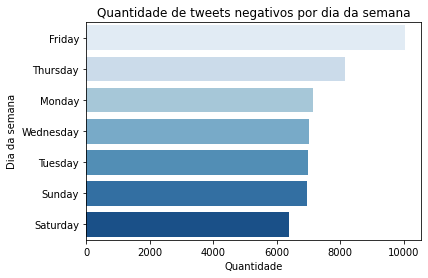

In [25]:
sns.barplot(y = data_engajamento.index, x = data_engajamento.values, orient = 'h',palette = "Blues")
plt.xlabel("Quantidade")
plt.ylabel("Dia da semana")
plt.title("Quantidade de tweets negativos por dia da semana")
plt.show()

In [26]:
df3 = df_all_folder("dados/ultimos_7_dias/").rename(columns={'level_1': "data"})

df3['data'] = pd.to_datetime(df3['data']).dt.day_name()
df3 = df3.groupby('data').sum()
df3

,ditadura,reforma trabalhista,feminismo,reforma agrária,corrupção,segurança
data,,,,,,
Friday,204,73,11,10,1316,221
Monday,286,63,11,16,1194,366
Saturday,241,175,5,10,1030,199
Sunday,231,74,5,16,1236,277
Thursday,216,30,9,23,1185,334
Tuesday,288,88,5,22,1124,264
Wednesday,281,145,2,17,1057,260


In [27]:
df = df1.join(df2).join(df3)
df

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto),(corrupto OR corrupta),machista,racista,nazista,...,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda),ditadura,reforma trabalhista,feminismo,reforma agrária,corrupção,segurança
data,,,,,,,,,,,,,,,,,,,,,
Friday,454,125,156,25,30,141,1015,28,34,80,...,100,14,243,1307,204,73,11,10,1316,221
Monday,581,178,387,22,40,116,813,17,41,52,...,50,24,222,791,286,63,11,16,1194,366
Saturday,385,207,129,13,28,121,681,22,27,50,...,47,9,171,703,241,175,5,10,1030,199
Sunday,433,173,155,15,28,108,826,17,15,47,...,40,48,181,713,231,74,5,16,1236,277
Thursday,410,153,142,28,29,119,932,25,53,121,...,41,32,232,783,216,30,9,23,1185,334
Tuesday,361,169,182,39,19,120,765,18,43,61,...,56,21,189,623,288,88,5,22,1124,264
Wednesday,280,115,201,44,16,123,794,29,31,54,...,66,15,204,586,281,145,2,17,1057,260


In [28]:
df['Total'] = df.apply(lambda x: x.sum(), axis = 1)

In [29]:
data_engajamento = df.groupby("data")['Total'].sum().sort_values(ascending=False)

In [30]:
data_engajamento

data
Friday       12811
Thursday     10837
Monday       10395
Sunday        9714
Tuesday       9658
Wednesday     9559
Saturday      8946
Name: Total, dtype: int64

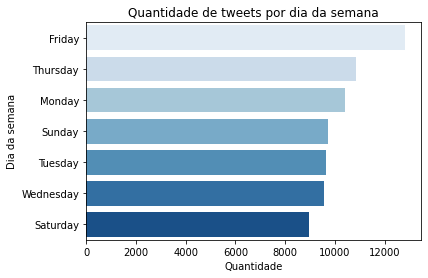

In [31]:
sns.barplot(y = data_engajamento.index, x = data_engajamento.values, orient = 'h',palette = "Blues")
plt.xlabel("Quantidade")
plt.ylabel("Dia da semana")
plt.title("Quantidade de tweets por dia da semana")
plt.show()

---

Levando em consideração os dias da semana, é notável que a sexta feira teve uma maior quantidade de tweets, seguida da quinta e segunda feira. Em relação aos comentários positivos, esses se concentram na segunda enquanto os negativos se concentram na sexta. 

---

## Adjetivos mais usados

In [32]:
df1 = df_all_folder("dados/ultimos_7_dias/pos/").rename(columns={'level_1': "data"})

df1 = df1.groupby('candidato').sum()
df1

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto)
candidato,,,,,,
bivar,5,3,1,1,0,15
bolsonaro,1135,510,433,67,125,422
ciro,130,106,231,31,19,67
eymael,0,1,0,1,0,0
janones,0,0,0,0,0,0
leonardo_pericles,0,0,0,0,0,0
luiz,1,0,0,0,0,0
lula,1522,481,570,85,45,338
pablo_macal,0,0,0,0,0,0


In [33]:
df2 = df_all_folder("dados/ultimos_7_dias/neg/").rename(columns={'level_1': "data"})

df2 = df2.groupby('candidato').sum()
df2

,(corrupto OR corrupta),machista,racista,nazista,facista,(burro OR burra),comunista,socialista,anarquista,(alienado OR alienada),...,(ladrão OR ladra),hipócrita,genocida,(ditador OR ditadora),(autoritário OR autoritária),sexista,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda)
candidato,,,,,,,,,,,,,,,,,,,,,
bivar,31,0,0,0,8,8,1,4,0,0,...,8,12,0,1,0,0,0,0,1,3
bolsonaro,2359,106,164,314,106,1936,962,245,12,180,...,4370,672,2338,468,178,25,192,96,872,3522
ciro,413,15,33,30,21,228,138,27,1,16,...,467,128,197,33,33,0,61,11,68,161
eymael,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
janones,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,2
leonardo_pericles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
luiz,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lula,3009,33,47,121,54,1198,1245,592,4,150,...,12443,553,1301,310,90,2,146,56,497,1816
pablo_macal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
dfm = df1.join(df2, how='outer')
dfm = dfm.groupby('candidato').sum()
dfm

,(honesto OR honesta),(democrático OR democrática),inteligente,consciente,(culto OR culta),(correta OR correto),(corrupto OR corrupta),machista,racista,nazista,...,(ladrão OR ladra),hipócrita,genocida,(ditador OR ditadora),(autoritário OR autoritária),sexista,populista,(maconheiro OR maconheira),imbecil,(vagabundo OR vagabunda)
candidato,,,,,,,,,,,,,,,,,,,,,
bivar,5,3,1,1,0,15,31,0,0,0,...,8,12,0,1,0,0,0,0,1,3
bolsonaro,1135,510,433,67,125,422,2359,106,164,314,...,4370,672,2338,468,178,25,192,96,872,3522
ciro,130,106,231,31,19,67,413,15,33,30,...,467,128,197,33,33,0,61,11,68,161
eymael,0,1,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
janones,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,2
leonardo_pericles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
luiz,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
lula,1522,481,570,85,45,338,3009,33,47,121,...,12443,553,1301,310,90,2,146,56,497,1816
pablo_macal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dfm = dfm.sum(axis = 0)

In [36]:
dfm = dfm.sort_values(ascending=False)

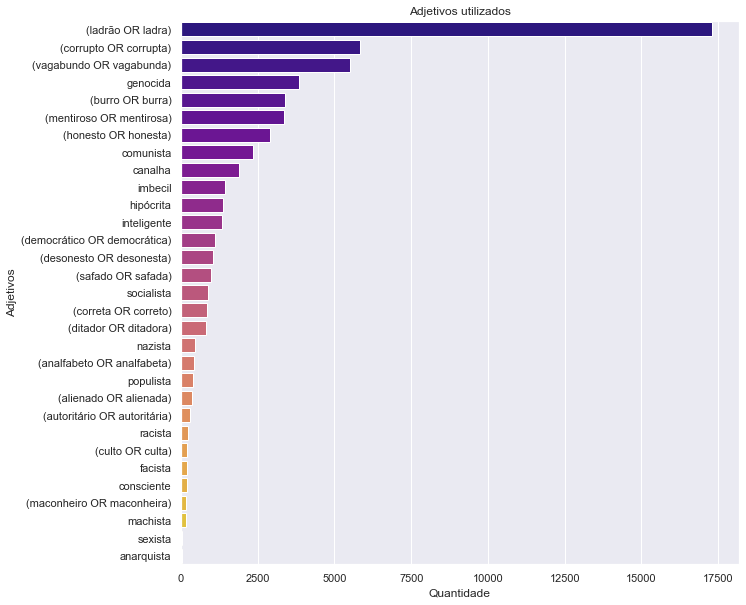

In [37]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(y = dfm.index, x = dfm.values, orient = 'h',palette = "plasma")
plt.xlabel("Quantidade")
plt.ylabel("Adjetivos")
plt.title("Adjetivos utilizados")
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

---

De maneira geral, adjetivos com conotação negativa foram mais usados do que aqueles com conotação positiva o pode induzir a uma hipótese de insatisfação da população para com os pré candidatos a presidencia da republica.

---

## Engajamento de tweets citando candidatos

In [38]:
# Carregando dados
import glob

def df_all_folder_100(path):
    
    all_files = glob.glob(path + "*_tweets.csv*")
    li = []
    
    print(all_files)
    for filename in all_files:
        print(filename)
        df = pd.read_csv(filename, index_col=0)
        li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace("_tweets.csv", "")
        x = x.replace("dados/ultimos_100_dias\\", "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().rename(columns={'level_0': "candidato"})

In [39]:
path = "dados/ultimos_100_tweets/"
df = df_all_folder(path, local=False)
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,bivar,0,@fartosuely1 @_afadamadrinha @thinkmoreBrazil ...,1537649055500840963,1,0,1,1410976003707576323,Twitter for Android,pt,2022-06-17 04:11:17+00:00,NaN
1,bivar,1,@ElenTorres10 Quem confia no Bivar?,1537646342503378944,0,0,0,238748488,Twitter for iPhone,pt,2022-06-17 04:00:30+00:00,NaN
2,bivar,2,"Moro pode escolher cargo para concorrer, diz o...",1537645947148242944,0,0,0,1487305993834934279,Twitter Web App,pt,2022-06-17 03:58:56+00:00,NaN
3,bivar,3,"@luzia74992679 Acorda Bivar, é Moro para Presi...",1537645839908315137,0,0,0,1410976003707576323,Twitter for Android,pt,2022-06-17 03:58:30+00:00,NaN
4,bivar,4,"Bivar pensa que todos são alienados, Moro para...",1537644855681290241,1,1,2,1487305993834934279,Twitter Web App,pt,2022-06-17 03:54:36+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
933,vera_lucia,95,"Assista a ""Lula tem 70% entre mais pobres | Ve...",1536453405455048708,0,0,3,1432674991057813504,Twitter Web App,pt,2022-06-13 21:00:12+00:00,NaN
934,vera_lucia,96,"Lula tem 70% entre mais pobres | Vera Lúcia, c...",1536449491863207937,0,0,0,1326936598504755203,Twitter Web App,pt,2022-06-13 20:44:39+00:00,NaN
935,vera_lucia,97,@luciiaa_vera lucia q tengo novio shhhhh esto ...,1536448267428450306,0,1,0,1320100771262758912,Twitter for iPhone,es,2022-06-13 20:39:47+00:00,NaN
936,vera_lucia,98,Arte Solidária na Aperipê Tv conversa com a fo...,1536447759951200258,0,0,0,136951846,Twitter Web App,pt,2022-06-13 20:37:46+00:00,NaN


In [40]:
dfrt = df.groupby('candidato')['retweets'].sum()
dfrt

candidato
Luiz_Felipe_d’Avila     59
bivar                   25
bolsonaro                7
ciro                     2
eymael                  49
janones                202
leonardo_pericles       21
lula                     0
pablo_maçal              0
simone_tebet            17
sofia_manzano          132
vera_lucia             415
Name: retweets, dtype: int64

In [41]:
dfrt = dfrt.sort_values(ascending=False)

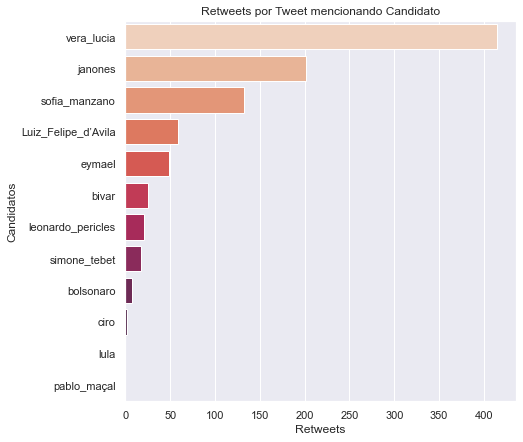

In [42]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(y = dfrt.index, x = dfrt.values, orient = 'h',palette = "rocket_r")
plt.xlabel("Retweets")
plt.ylabel("Candidatos")
plt.title("Retweets por Tweet mencionando Candidato")
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

In [43]:
dfl = df.groupby('candidato')['likes'].sum()
dfl

candidato
Luiz_Felipe_d’Avila     553
bivar                   188
bolsonaro                37
ciro                     29
eymael                  663
janones                1961
leonardo_pericles       222
lula                      9
pablo_maçal               2
simone_tebet             72
sofia_manzano          1304
vera_lucia             1866
Name: likes, dtype: int64

In [44]:
dfl = dfl.sort_values(ascending=False)

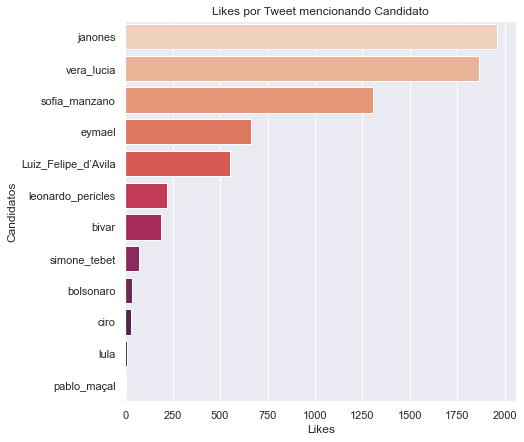

In [45]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(y = dfl.index, x = dfl.values, orient = 'h',palette = "rocket_r")
plt.xlabel("Likes")
plt.ylabel("Candidatos")
plt.title("Likes por Tweet mencionando Candidato")
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

In [46]:
dfreplys = df.groupby('candidato')['replys'].sum()
dfreplys

candidato
Luiz_Felipe_d’Avila     74
bivar                   52
bolsonaro                2
ciro                    12
eymael                  60
janones                308
leonardo_pericles       14
lula                     3
pablo_maçal              0
simone_tebet            60
sofia_manzano           44
vera_lucia             302
Name: replys, dtype: int64

In [47]:
dfreplys = dfreplys.sort_values(ascending=False)

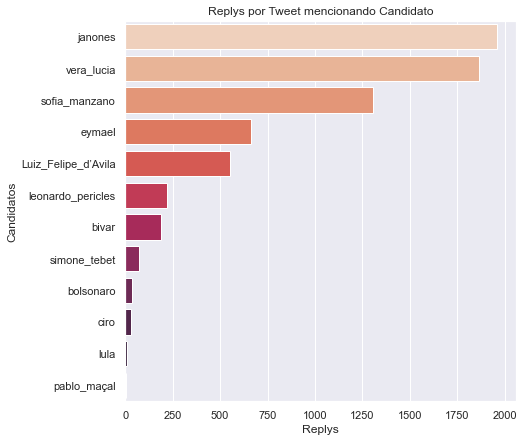

In [48]:
sns.set(rc={'figure.figsize':(7,7)})
sns.barplot(y = dfl.index, x = dfl.values, orient = 'h',palette = "rocket_r")
plt.xlabel("Replys")
plt.ylabel("Candidatos")
plt.title("Replys por Tweet mencionando Candidato")
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

---

Contrário ao esperado, os principais pré-candidatos a presidência (Lula, Bolsonaro e Ciro) apresentam um número muito menor de curtidas, retweets e respostas em comparação a outros candidatos como André Janones e Vera Lúcia. Esse comportamento se deve ao fato de que esses candidatos são mencionados mais vezes em comparação aos outros. Tendo em vista que essa análise foi feita a partir dos ultimos 100 tweets, candidatos com um fluxo maior de menções tendem a ter um engajamento menor nesse tipo de amostra.

---

## Word cloud de tweets por candidatos

In [49]:
!pip install wordcloud

In [50]:
path = "dados/ultimos_100_tweets/"
df = df_all_folder(path, local=False)
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,bivar,0,@fartosuely1 @_afadamadrinha @thinkmoreBrazil ...,1537649055500840963,1,0,1,1410976003707576323,Twitter for Android,pt,2022-06-17 04:11:17+00:00,NaN
1,bivar,1,@ElenTorres10 Quem confia no Bivar?,1537646342503378944,0,0,0,238748488,Twitter for iPhone,pt,2022-06-17 04:00:30+00:00,NaN
2,bivar,2,"Moro pode escolher cargo para concorrer, diz o...",1537645947148242944,0,0,0,1487305993834934279,Twitter Web App,pt,2022-06-17 03:58:56+00:00,NaN
3,bivar,3,"@luzia74992679 Acorda Bivar, é Moro para Presi...",1537645839908315137,0,0,0,1410976003707576323,Twitter for Android,pt,2022-06-17 03:58:30+00:00,NaN
4,bivar,4,"Bivar pensa que todos são alienados, Moro para...",1537644855681290241,1,1,2,1487305993834934279,Twitter Web App,pt,2022-06-17 03:54:36+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
933,vera_lucia,95,"Assista a ""Lula tem 70% entre mais pobres | Ve...",1536453405455048708,0,0,3,1432674991057813504,Twitter Web App,pt,2022-06-13 21:00:12+00:00,NaN
934,vera_lucia,96,"Lula tem 70% entre mais pobres | Vera Lúcia, c...",1536449491863207937,0,0,0,1326936598504755203,Twitter Web App,pt,2022-06-13 20:44:39+00:00,NaN
935,vera_lucia,97,@luciiaa_vera lucia q tengo novio shhhhh esto ...,1536448267428450306,0,1,0,1320100771262758912,Twitter for iPhone,es,2022-06-13 20:39:47+00:00,NaN
936,vera_lucia,98,Arte Solidária na Aperipê Tv conversa com a fo...,1536447759951200258,0,0,0,136951846,Twitter Web App,pt,2022-06-13 20:37:46+00:00,NaN


In [51]:
df['text'] = df.apply(lambda x: x['text'].lower().split(), axis = 1)

In [52]:
from wordcloud import WordCloud
from collections import Counter

def generate_wordcloud(df, candidato):
    stop_words = [candidato, 'que', 'a', 'o', 'é', 'de', 'uma', 'não', 'eu', 'se', 'e', 'da', 'as', 'ok', 'com', 'umas', 'um', 'uns', 'pra', 'no', 'em', 'na', 'tem', 'para', 'pro']
    df = df[df['candidato'] == candidato]
    txt = []
    
    for text in df['text']:
        for word in text:
            if word not in stop_words:
                txt.append(word)
        

    wordcloud = WordCloud(max_font_size=100, width=800, height=600).generate_from_frequencies(Counter(txt))

    fig, ax = plt.subplots(figsize=(10,6))
    ax.imshow(wordcloud, interpolation='bilinear')
    plt.title("{}".format(candidato.title()))
    ax.set_axis_off()
    plt.imshow(wordcloud);
    plt.show()

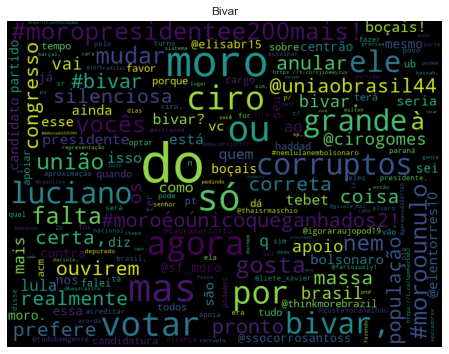

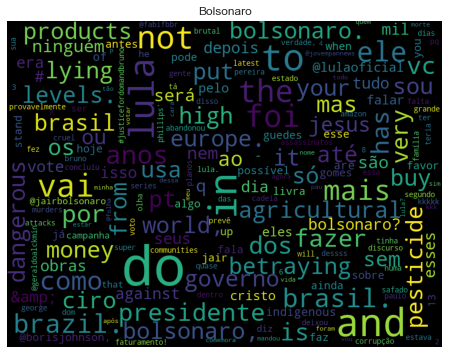

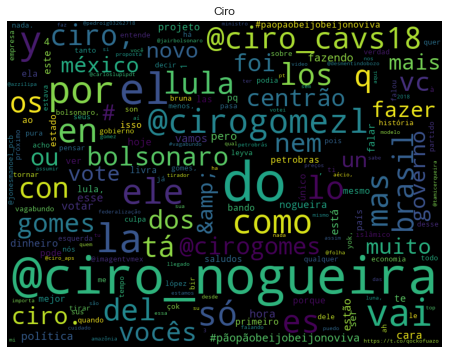

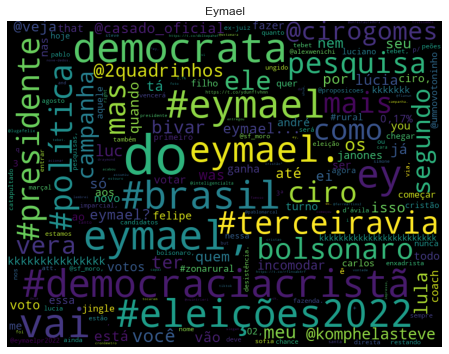

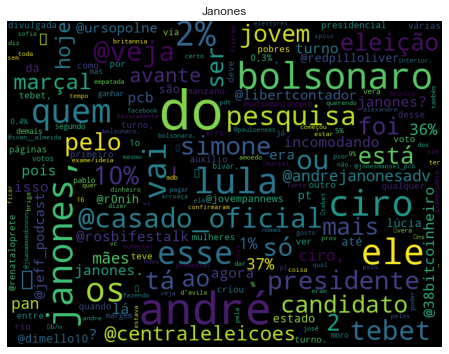

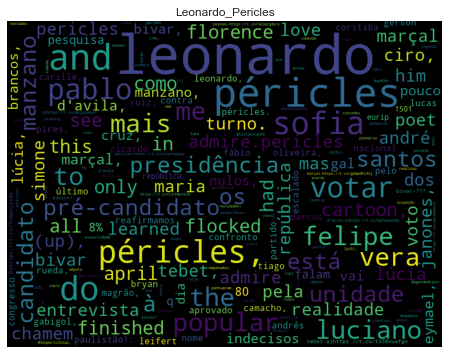

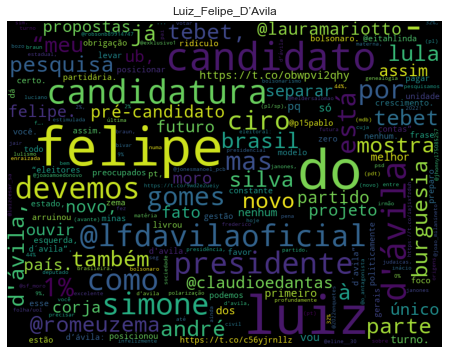

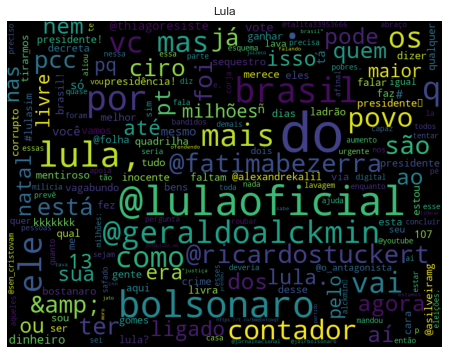

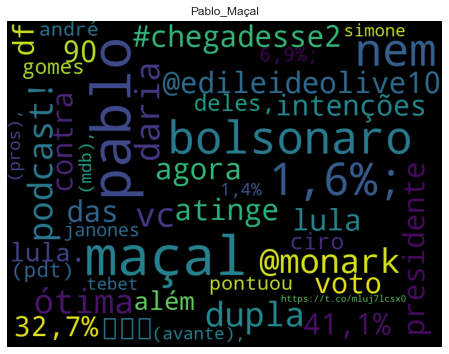

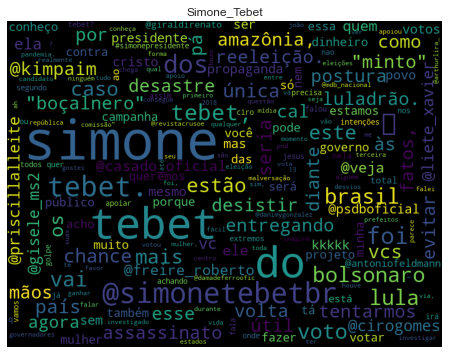

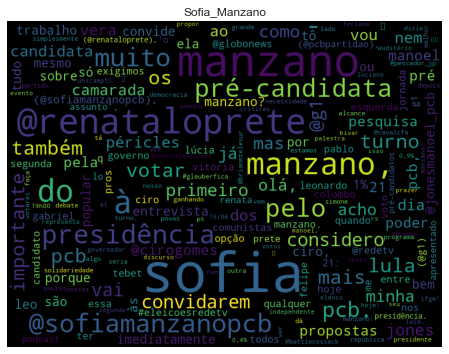

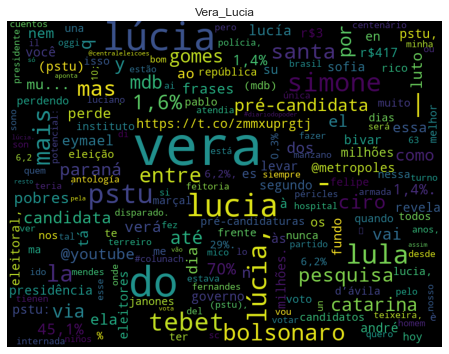

In [53]:
for candidato in df['candidato'].unique():
    generate_wordcloud(df, candidato)

In [54]:
df['text']

0      [@fartosuely1, @_afadamadrinha, @thinkmorebraz...
1              [@elentorres10, quem, confia, no, bivar?]
2      [moro, pode, escolher, cargo, para, concorrer,...
3      [@luzia74992679, acorda, bivar,, é, moro, para...
4      [bivar, pensa, que, todos, são, alienados,, mo...
                             ...                        
933    [assista, a, "lula, tem, 70%, entre, mais, pob...
934    [lula, tem, 70%, entre, mais, pobres, |, vera,...
935    [@luciiaa_vera, lucia, q, tengo, novio, shhhhh...
936    [arte, solidária, na, aperipê, tv, conversa, c...
937    [descubre, a, la, escritora, lucía, barcenilla...
Name: text, Length: 938, dtype: object

---

Word clouds é um étodo de visualização quantificada do número de ocorrência de palavras em determinado contexto. Nesse caso em específico, as word clouds ajudam a analisar melhor palavras e também hashtags recorrentes associadas a cada candidato mencionado.

---

## Mapa de candidatos

In [55]:
df = df_all_folder("dados/ultimos_100_tweets/", local=True)

In [56]:
df

,candidato,level_1,geo_full_name,geo_id,geo_x1,geo_x2,geo_y1,geo_y2
0,bivar,0,"Rurópolis, Brasil",4bc87f0150a9fde2,-4.678348,-55.897317,-3.722033,-54.69506
1,bivar,1,"Rio de Janeiro, Brasil",97bcdfca1a2dca59,-23.08302,-43.795449,-22.739823,-43.087707
2,bolsonaro,0,"São Paulo, Brasil",68e019afec7d0ba5,-24.008814,-46.826039,-23.356792,-46.365052
3,bolsonaro,1,"Parnamirim, Brasil",eb064d2fe812dac8,-5.984814,-35.309263,-5.851611,-35.119821
4,bolsonaro,2,"Gurupi, Brasil",7bdb0399a9e02f18,-11.962539,-49.180066,-11.353907,-48.569687
5,bolsonaro,3,"Rio de Janeiro, Brasil",97bcdfca1a2dca59,-23.08302,-43.795449,-22.739823,-43.087707
6,bolsonaro,4,"Foz do Iguaçu, Brasil",91f818a4abfb1d4d,-25.695489,-54.619501,-25.212313,-54.294691
7,ciro,0,"São Paulo, Brasil",68e019afec7d0ba5,-24.008814,-46.826039,-23.356792,-46.365052
8,ciro,1,"Teresina, Brasil",8bc4eeacf63235f9,-5.586602,-42.970679,-4.786034,-42.598967
9,eymael,0,"Brasília, Brasil",5722ff20ba67083b,-16.052405,-48.285982,-15.500103,-47.307264


In [57]:
df['geo_x'] = (df['geo_x1'] + df['geo_y1'])/2.0
df['geo_y'] = (df['geo_x2'] + df['geo_y2'])/2.0

In [58]:
!pip install folium

In [59]:
import folium

def generate_map(df):


    map = folium.Map(location=[-28.87021, -49.45203], zoom_start=0)

    for idx, row in df.iterrows():
        folium.Marker([row['geo_x'], row['geo_y']], icon=folium.Icon(color='red', icon='home', prefix='fa')).add_to(map)

    return map

In [60]:
generate_map(df)

---

Outra gama de informações que pode ser retirada de um conjunto de tweets é a correlação entre pré candidato e a localização de onde um tweet foi feito. Analisando a tabela e também o mapa gerado, podemos analisar um pouco mais sobre a localização do eleitorado de cada candidato. Como exemplo, os candidatos Lula e Ciro apresentam localizações entre norte e nordeste enquanto Bolsonaro e Janones tem em maioria tweets feitos pelas regiões sudeste e centro-oeste.

---

## Origem do tweet por candidato

In [80]:
path = "dados/ultimos_100_tweets/"
df = df_all_folder(path, local=False)
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,bivar,0,@fartosuely1 @_afadamadrinha @thinkmoreBrazil ...,1537649055500840963,1,0,1,1410976003707576323,Twitter for Android,pt,2022-06-17 04:11:17+00:00,NaN
1,bivar,1,@ElenTorres10 Quem confia no Bivar?,1537646342503378944,0,0,0,238748488,Twitter for iPhone,pt,2022-06-17 04:00:30+00:00,NaN
2,bivar,2,"Moro pode escolher cargo para concorrer, diz o...",1537645947148242944,0,0,0,1487305993834934279,Twitter Web App,pt,2022-06-17 03:58:56+00:00,NaN
3,bivar,3,"@luzia74992679 Acorda Bivar, é Moro para Presi...",1537645839908315137,0,0,0,1410976003707576323,Twitter for Android,pt,2022-06-17 03:58:30+00:00,NaN
4,bivar,4,"Bivar pensa que todos são alienados, Moro para...",1537644855681290241,1,1,2,1487305993834934279,Twitter Web App,pt,2022-06-17 03:54:36+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
933,vera_lucia,95,"Assista a ""Lula tem 70% entre mais pobres | Ve...",1536453405455048708,0,0,3,1432674991057813504,Twitter Web App,pt,2022-06-13 21:00:12+00:00,NaN
934,vera_lucia,96,"Lula tem 70% entre mais pobres | Vera Lúcia, c...",1536449491863207937,0,0,0,1326936598504755203,Twitter Web App,pt,2022-06-13 20:44:39+00:00,NaN
935,vera_lucia,97,@luciiaa_vera lucia q tengo novio shhhhh esto ...,1536448267428450306,0,1,0,1320100771262758912,Twitter for iPhone,es,2022-06-13 20:39:47+00:00,NaN
936,vera_lucia,98,Arte Solidária na Aperipê Tv conversa com a fo...,1536447759951200258,0,0,0,136951846,Twitter Web App,pt,2022-06-13 20:37:46+00:00,NaN


In [81]:
df = df.groupby('candidato')['source'].value_counts()

In [82]:
df = df.to_frame()
df

source
candidato           source                            
Luiz_Felipe_d’Avila Twitter for Android              8
                    Twitter Web App                  7
                    Twitter for iPhone               2
                    Echobox                          1
bivar               Twitter for Android             38
                    Twitter Web App                 32
                    Twitter for iPhone              26
                    Bahia.ba                         1
                    Grabyo                           1
                    TweetDeck                        1
                    WordPress.com                    1
bolsonaro           Twitter for Android             65
                    Twitter Web App                 18
                    Twitter for iPhone              15
                    WordPress.com                    1
ciro                Twitter for Android             59
                    Twitter Web App                 21
                    Twitter for iPhone              20
eymael              Twitter for Android             46
                    Twitter Web App                 43
                    Twitter for iPhone               8
                    politicasemfato                  1
janones             Twitter for Android             55
                    Twitter Web App                 26
                    Twitter for iPhone              15
                    Echobox                          1
                    IFTTT                            1
                    TweetDeck                        1
                    WordPress.com                    1
leonardo_pericles   Twitter for Android             14
                    Twitter Web App                  5
                    App-Auto-DM-tweet-TG_t1z0z       2
                    Cheap Bots, Done Quick!          1
                    Tweetbot for Mac                 1
                    Twitter for iPhone               1
lula                Twitter for Android             64
                    Twitter for iPhone              18
                    Twitter Web App                 16
                    TweetDeck                        1
                    Twitter                          1
pablo_maçal         Twitter for Android              2
                    Twitter for iPhone               1
simone_tebet        Twitter for Android             49
                    Twitter Web App                 33
                    Twitter for iPhone              14
                    meu_app_twitter                  2
                    Echofon                          1
                    Twitter for iPad                 1
sofia_manzano       Twitter for Android             55
                    Twitter Web App                 34
                    Twitter for iPhone               6
                    WordPress.com                    1
vera_lucia          Twitter for Android             42
                    Twitter Web App                 30
                    Twitter for iPhone              19
                    TweetDeck                        3
                    IFTTT                            2
                    dlvr.it                          2
                    Instagram                        1
                    Revive Social App                1

---

A análise da origem de tweets permite verificar padrões em possíveis eleitores de cada pré candidato bem como a identificação de possíveis bots ou mensagens automáticas relacionadas a esses candidatos.

---

## Classificação do Tweet

In [ ]:
A seguir faremos a classificação do conteúdo dos tweets utilizando Árvore de Decisão, XGBoost e XGBoost com tunagem de hiperpar.

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

# Read the TFIDF vectors
tfidf_df = pd.read_csv('/content/train_tfidf.csv')
bow_df = pd.read_csv('/content/train_bow.csv')

# # Initialize the model
clf_decision_tfidf = DecisionTreeClassifier(random_state=2, max_depth=10)

# # Fit the model 
clf_decision_tfidf.fit(bow_df, Y_train['sentimento'])

DecisionTreeClassifier(max_depth=10, random_state=2)

In [ ]:
from sklearn.metrics import classification_report
test_predictions_tfidf = clf_decision_tfidf.predict(test_features_bow)
print(classification_report(Y_test['sentimento'],test_predictions_tfidf))


              precision    recall  f1-score   support

           0       0.26      0.14      0.18        84
           1       0.57      0.82      0.67       193
           2       0.09      0.03      0.04        71

    accuracy                           0.50       348
   macro avg       0.31      0.33      0.30       348
weighted avg       0.40      0.50      0.43       348



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


## XGBoost

In [ ]:
import xgboost as xgb
params = {
    # Parameters that we are going to tune.
    'max_depth':100,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'n_estimators': 1000
}

hyp = xgb.XGBClassifier(params=params)
evaluation = [(tfidf_df.values, Y_train['sentimento'].values)]
hyp.fit(tfidf_df.values, Y_train['sentimento'].values,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=1000,verbose=False)

XGBClassifier(objective='multi:softprob',
              params={'colsample_bytree': 1, 'eta': 0.3, 'max_depth': 100,
                      'min_child_weight': 1, 'n_estimators': 1000,
                      'subsample': 1})

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

test_predictions_tfidf = hyp.predict(np.matrix(test_features_bow))
probabilities_tfidf = hyp.predict_proba(np.matrix(test_features_bow))

print(classification_report(Y_test['sentimento'],test_predictions_tfidf))
loss = log_loss(Y_test['sentimento'], probabilities_tfidf)
print(loss)

              precision    recall  f1-score   support

           0       0.31      0.06      0.10        84
           1       0.57      0.87      0.69       193
           2       0.22      0.11      0.15        71

    accuracy                           0.52       348
   macro avg       0.37      0.35      0.31       348
weighted avg       0.44      0.52      0.44       348

1.0103159674239912


## BERT

In [ ]:
df = df_all_folder("/content/analise-de-sentimento-politico-pelo-twitter-master/analise-de-sentimento-politico-pelo-twitter/dados/ultimos_100_tweets/")
df = df[df['text'].notna()].reset_index(drop=True)
y = df_all_folder("/content/analise-de-sentimento-politico-pelo-twitter-master/analise-de-sentimento-politico-pelo-twitter/dados/ultimos_100_tweets/",sufixo='_labeled.csv')['level_1'].dropna().apply(lambda x : x.upper()).reset_index(drop=True)
y = y.apply(lambda x: 0 if x == 'NG' else 1 if x == 'NT' else 2)
df['sentimento'] = y
df = df[cols]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

test_predictions_tfidf = hyp.predict(np.matrix(test_features_bow))
probabilities_tfidf = hyp.predict_proba(np.matrix(test_features_bow))

print(classification_report(Y_test['sentimento'],test_predictions_tfidf))
loss = log_loss(Y_test['sentimento'], probabilities_tfidf)
print(loss)
train_df, test_df = train_test_split(df, test_size=0.3)

train_df = train_df[['text', 'sentimento']]

In [ ]:
test_df = test_df[['text', 'sentimento']]


In [ ]:
from transformers import AutoTokenizer, TFPreTrainedModel, AutoModel
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "neuralmind/bert-large-portuguese-cased",
    num_labels=3,
    args=train_args,
    use_cuda=True
)
  
tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-large-portuguese-cased")
#model = AutoModel.from_pretrained("neuralmind/bert-base-portuguese-cased")

Some weights of the model checkpoint at neuralmind/bert-large-portuguese-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from th

In [ ]:
train_df

,text,sentimento
1094,"@Ciro_de_trator A beleza, pq eu realmente nao ...",1
1736,"Daqui a pouco, as 18h, a rádio web 2 de Julho ...",1
1104,@lauramariotto @EletricPhuneral Ciro não tem n...,0
1001,@CAlvesRJ @DriicaaMR @ciro_nogueira Vc conhece...,1
1329,@SofiaManzanoPCB Viva nossa candidata PCB à pr...,0
...,...,...
94,"@driufc @HMarahu Não, a foto correta do Lula e...",0
887,O presidente do @23cidadania do Espírito Santo...,2
1334,"Meu Deus, como tem profissionais incompetentes...",0
781,@andre_assaf @Kennedy14053908 @politica_estilo...,0


In [ ]:
!rm -rf outputs

In [ ]:
model.train_model(train_df, overwrite_output_dir= True)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:602: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1216 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/152 [00:00<?, ?it/s]

(608, 0.8782509740589088)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/522 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/66 [00:00<?, ?it/s]

In [ ]:
result

{'mcc': 0.13691602783899004,
 'f1': 0.5095785440613027,
 'acc': 0.5095785440613027,
 'eval_loss': 1.2251526925599936}

In [ ]:
wrong_predictions

[{'guid': 0, 'text_a': '@ciro_nogueira Vagabundo vc é um safado', 'text_b': None, 'label': 0},
 {'guid': 2, 'text_a': 'Nem Lula, nem Bolsonaro. Os dois são iguais. \n\nVou de Simone Tebet. \n\nNÃO PÉRA, 😱!!!!!!\n\nEsse é o Teatro das Tesouras pra enganar você. https://t.co/cpiw6d7mMO', 'text_b': None, 'label': 0},
 {'guid': 3, 'text_a': '@GadoDecider Fiquem em casa a economia a gente vê depois... O depois chegou, agora chorem e elegem o Lula pra piorar o que resta.', 'text_b': None, 'label': 0},
 {'guid': 4, 'text_a': '@EletricPhuneral @lauramariotto Ciro gomes foi ministro da fazenda e teve o maior superávit da história, ajudou a salvar o plano real, como governador é reconhecido pela responsabilidade fiscal.', 'text_b': None, 'label': 1},
 {'guid': 5, 'text_a': '@o_antagonista @EduardoLeite_ E o Bivar, cresceu muito nas pesquisa eleitorais, ele tinha 0 % agora tem 0,25%. Já, já vai disputar o 2º turno com o Lula! https://t.co/P8snHJEmfC', 'text_b': None, 'label': 2},
 {'guid': 9, 'te

## Recurrent Neural Network (RNN)

In [5]:
import pandas as pd
# Carregando dados
import glob

def df_all_folder(path,sufixo="_tweets.csv"):
    all_files = glob.glob(path + "*"+sufixo)
    li = []    
    
    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        if "janones" not in filename: 
            li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace(sufixo, "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().rename(columns={'level_0': "candidato"})

In [6]:
df = df_all_folder("dados/ultimos_100_tweets/")
df

,candidato,level_1,text,id,retweets,replys,likes,author_id,source,lang,created_at,place_id
0,dados/ultimos_100_tweets\bivar,0,@fartosuely1 @_afadamadrinha @thinkmoreBrazil ...,1.537649e+18,1.0,0.0,1.0,1.410976e+18,Twitter for Android,pt,2022-06-17 04:11:17+00:00,NaN
1,dados/ultimos_100_tweets\bivar,1,@ElenTorres10 Quem confia no Bivar?,1.537646e+18,0.0,0.0,0.0,2.387485e+08,Twitter for iPhone,pt,2022-06-17 04:00:30+00:00,NaN
2,dados/ultimos_100_tweets\bivar,2,"Moro pode escolher cargo para concorrer, diz o...",1.537646e+18,0.0,0.0,0.0,1.487306e+18,Twitter Web App,pt,2022-06-17 03:58:56+00:00,NaN
3,dados/ultimos_100_tweets\bivar,3,"@luzia74992679 Acorda Bivar, é Moro para Presi...",1.537646e+18,0.0,0.0,0.0,1.410976e+18,Twitter for Android,pt,2022-06-17 03:58:30+00:00,NaN
4,dados/ultimos_100_tweets\bivar,4,"Bivar pensa que todos são alienados, Moro para...",1.537645e+18,1.0,1.0,2.0,1.487306e+18,Twitter Web App,pt,2022-06-17 03:54:36+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,dados/ultimos_100_tweets\sofia_manzano,95,@Anitta ANITTA VC PRECISA VER SOBRE A VERA LÚC...,1.546963e+18,0.0,0.0,0.0,1.460646e+18,Twitter for Android,pt,2022-07-12 21:02:57+00:00,NaN
1832,dados/ultimos_100_tweets\sofia_manzano,96,Olá 👋 passando aqui para informar que a partir...,1.546962e+18,0.0,0.0,4.0,4.195617e+08,Twitter Web App,pt,2022-07-12 20:57:43+00:00,NaN
1833,dados/ultimos_100_tweets\sofia_manzano,97,O dinheiro que a mona investiu pra superar a V...,1.546958e+18,0.0,1.0,1.0,1.158390e+18,Twitter for iPhone,pt,2022-07-12 20:40:36+00:00,NaN
1834,dados/ultimos_100_tweets\sofia_manzano,98,"Daqui a pouco, as 18h, a rádio web 2 de Julho ...",1.546957e+18,0.0,0.0,0.0,1.506264e+18,Twitter Web App,pt,2022-07-12 20:35:52+00:00,NaN


In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\luish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
df = df[df['text'].notna()]

In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('portuguese'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)
     
x = df.apply(lambda row: remove_stop_words(row['text']), axis=1)
x


0       thinkmorebrazil deltanmd acorda bivar moro pre...
1                                            confia bivar
2       moro pode escolher cargo concorrer diz preside...
3                            acorda bivar moro presidente
4       bivar pensa todos alienados moro governador pr...
                              ...                        
1831    anitta anitta vc precisa ver sobre vera lúcia ...
1832    olá passando aqui informar partir semana pré p...
1833    dinheiro mona investiu pra superar vera lúcia ...
1834    daqui pouco rádio web julho reapresenta entrev...
1835    simonetebetbr tebet polarização pt x psdb bols...
Length: 1738, dtype: object

In [ ]:
import pandas as pd
# Carregando dados
import glob

def df_all_folder(path,sufixo="_tweets.csv"):
    all_files = glob.glob(path + "*"+sufixo)
    li = []    
    
    for filename in all_files:
        df = pd.read_csv(filename, index_col=0)
        if "janones" not in filename: 
            li.append(df)
    names = []
    for filename in all_files:
        x = filename.replace(path, "")
        x = x.replace(sufixo, "")
        names.append(x.replace(" ","_"))
    return pd.concat(li, axis=0, keys =names).reset_index().rename(columns={'level_0': "candidato"})

df = df_all_folder("dados/ultimos_100_tweets/")
df

import nltk
nltk.download('punkt')

nltk.download('stopwords')

df = df[df['text'].notna()]

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('portuguese'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)
     
x = df.apply(lambda row: remove_stop_words(row['text']), axis=1)
x


In [12]:
# x_test = x[0:int(len(x)*0.3)]
# x_trein = x[int(len(x)*0.3):len(x)]

In [13]:
y = df_all_folder("dados/ultimos_100_tweets/",sufixo='_labeled.csv')['level_1'].dropna().apply(lambda x : x.upper())
y

0       NT
1       NG
2       NG
3       NG
4       NG
        ..
1734    PS
1735    NT
1736    NT
1737    NT
1738    NT
Name: level_1, Length: 1738, dtype: object

In [14]:
y = y.apply(lambda x: 0 if x == 'NG' else 1 if x == 'NT' else 2)
y

0       1
1       0
2       0
3       0
4       0
       ..
1734    2
1735    1
1736    1
1737    1
1738    1
Name: level_1, Length: 1738, dtype: int64

In [15]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

def tokenizar(x):
    max_words = 20000
    
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    return pad_sequences(sequences, maxlen=500)
x = tokenizar(x)

In [16]:
import numpy as np
new_y = y.copy()
new_y = new_y.apply(lambda x: 1 if x == 2 else 0)
new_y

0       0
1       0
2       0
3       0
4       0
       ..
1734    1
1735    0
1736    0
1737    0
1738    0
Name: level_1, Length: 1738, dtype: int64

In [17]:
y_test = y[0:int(len(y)*0.3)]
y_trein = y[int(len(y)*0.3):len(y)]
x_test = x[0:int(len(x)*0.3)]
x_trein = x[int(len(x)*0.3):len(x)]
y_test_n = new_y[0:int(len(new_y)*0.3)]
y_trein_n = new_y[int(len(new_y)*0.3):len(new_y)]

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Masking, Conv1D, MaxPool1D, GRU
from keras.layers import Embedding
from keras.metrics import Precision, Recall
 
model = Sequential() 
model.add(Embedding(20000, 32, input_length=500)) 
model.add(Masking(mask_value=0.0))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [28]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]

(None, 500) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>


[None]

In [29]:
model.fit(x_trein, y_trein_n, epochs=12, verbose=1)

Epoch 1/12
39/39 [==============================] - 55s 997ms/step - loss: 0.5977 - accuracy: 0.7354
Epoch 2/12
39/39 [==============================] - 38s 986ms/step - loss: 0.5775 - accuracy: 0.7354
Epoch 3/12
39/39 [==============================] - 38s 970ms/step - loss: 0.5252 - accuracy: 0.7510
Epoch 4/12
39/39 [==============================] - 40s 1s/step - loss: 0.3617 - accuracy: 0.8529
Epoch 5/12
39/39 [==============================] - 38s 984ms/step - loss: 0.2291 - accuracy: 0.9121
Epoch 6/12
39/39 [==============================] - 38s 983ms/step - loss: 0.1706 - accuracy: 0.9392
Epoch 7/12
39/39 [==============================] - 45s 1s/step - loss: 0.1413 - accuracy: 0.9532
Epoch 8/12
39/39 [==============================] - 39s 1s/step - loss: 0.1654 - accuracy: 0.9573
Epoch 9/12
39/39 [==============================] - 39s 997ms/step - loss: 0.1296 - accuracy: 0.9606
Epoch 10/12
39/39 [==============================] - 39s 989ms/step - loss: 0.1135 - accuracy: 0.964

In [30]:
model.evaluate(np.array(x_test),np.array(y_test_n))

17/17 [==============================] - 10s 240ms/step - loss: 1.1242 - accuracy: 0.7313


[1.1241596937179565, 0.7312859892845154]

In [31]:
previsao = model.predict(np.array(x_test))

17/17 [==============================] - 10s 237ms/step


In [36]:
pd.set_option('display.max_rows', 100)

In [127]:
def convert(num):
    if num <=0:
        return 0
    else:
        return 1

arr_previsao = previsao
arr_real = y_test_n
converter = np.vectorize(convert)
arr_previsao = converter(arr_previsao)

In [128]:
def classificador(previsao, real):
    VP, VN, FN, FP = 0, 0, 0, 0
    for i in range(521):
        if real[i] == 1 and previsao[i] == 1:
            VP+=1
        elif real[i] == 0 and previsao[i] == 0:
            VN+=1
        elif real[i] == 1 and previsao[i] == 0:
            FN+=1
        else:
            FP+=1
    return VP, VN, FN, FP

In [129]:
VP, VN, FN, FP = classificador(arr_previsao, arr_real)

In [133]:
acuracia = (VP+VN)/(VP+VN+FP+FN)
recall = VP / (VP + FN)
precisao = VP / (VP + FP)
f1_score = 2 * (precisao * recall) / (precisao + recall)

print("Acuracia: {:.2f} \nRevocação: {:.2f} \nPrecisão: {:.2f} \nf1-Score: {:.2f}".format(acuracia,recall,precisao,f1_score))

Acuracia: 0.72 
Revocação: 0.26 
Precisão: 0.21 
f1-Score: 0.23
